In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd
def printmd(string):
    "prints text in bold"
    display(Markdown(string))

In [2]:
essdata = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
essdata.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
np.unique(essdata['year'])

array([6, 7], dtype=int64)

In [4]:
essdata.nunique()

cntry         6
idno       3086
year          2
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
sclmeet       7
sclact        5
gndr          2
agea         83
partner       2
dtype: int64

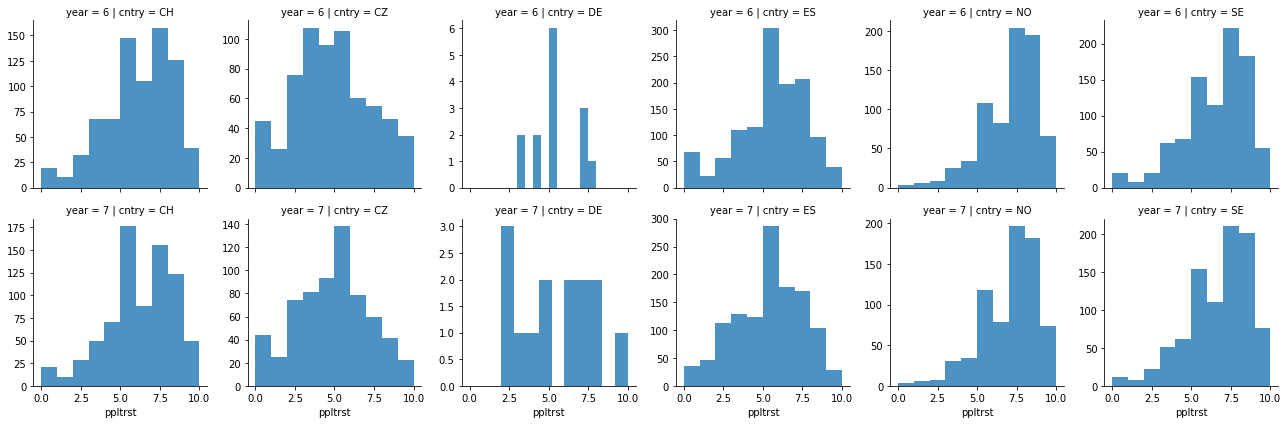

In [5]:
# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(essdata, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
plt.show()
cntrys = list(essdata.cntry.unique())
years = list(essdata.year.unique())
    
    

In [6]:
for cnt in cntrys:
    ess_temp = essdata[essdata.cntry ==cnt].dropna()
    for year in years:
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].ppltrst))
    print()

CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715777039527893, 1.8779569010973773e-09)

DE 6 (0.8929170966148376, 0.1069343090057373)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292042255401611, 7.92943027973029e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



In [7]:
for cnt in cntrys:
    ess_temp = essdata[essdata.cntry ==cnt]
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].ppltrst, 
                        y=ess_temp[ess_temp.year == 7].ppltrst))

CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)
CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)
DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)
ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)
NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)
SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2781: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2782: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Spain-ES and Sweden-SE were the two countries whose trust in people changed from 2012 to 2014.

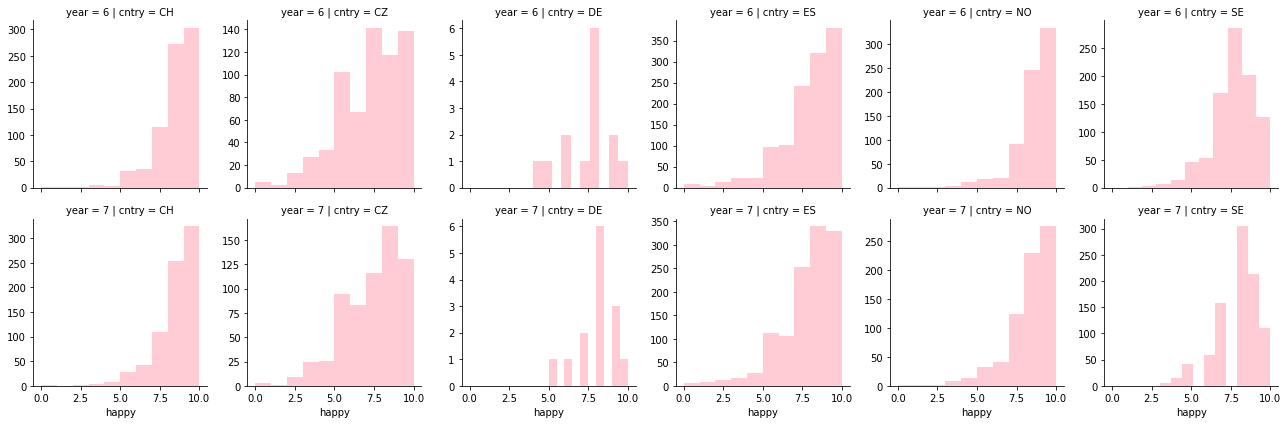

In [8]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(essdata, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8, color='pink')
plt.show()
cntrys = list(essdata.cntry.unique())
years = [6,7]


In [9]:
for cnt in cntrys:    
    ess_temp = essdata[essdata.cntry ==cnt].dropna()
    for year in years:
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].happy))

CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)
CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.944864809513092, 3.1645106863707403e-14)
DE 6 (0.9160984754562378, 0.22211012244224548)
DE 7 (0.9213663339614868, 0.23006466031074524)
ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)
NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795286417007446, 4.680781911775775e-23)
SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.9121034145355225, 5.600535793318595e-22)


In [10]:
for cnt in cntrys:
    ess_temp = essdata[essdata.cntry ==cnt]
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].happy, y=ess_temp[ess_temp.year == 7].happy))

CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)
CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)
DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)
NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)
SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)


Czech Republic-CZ, Norway-NO, and Spain-ES suffered a happiness change between 2012 and 2014 as their p-values are below the threshhold 0.05 , therefore rejecting the null hypothesis that the distributions are the same.